# Просторова обробка зображень: просторова фільтрація

У даній лабораторній роботі розглянуто наступні приклади просторової фільтрації:

1. Лінійні згладжувальні фільтри
2. Нелінійні згладжувальні фільтри
3. Фільтри підвищення різкості

### Імпортуємо необхдіні пакети та бібліотеки

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Лінійні згладжувальні фільтри

Просторова фільтрація зображення **f** з розмірами *M x N* за допомогою фільтра **w** з розмірами *m x n* має наступний вигляд:

$$\begin{eqnarray}
g(x,y) = &\sum_{s=-a}^{a} &\sum_{t=-b}^b f(x, y)&w(x - s, y - t)
\end{eqnarray}$$


Згладжувальні фільтри використовуються для попередньої обробки зображень - для подавлення або видалення шуму, видалення невеликих деталей, видалення розривів ліній. Для подавлення або видалення шуму використовуються як лінійні так і нелінійні згладжувальні фільтри. Для видалення невеликих деталей або видалення розривів використовуються лінійні згладжувальні фільтри.

Результатом використання лінійного згладжувального фільтра з розмірами NxN є середнє значення інтенсивності пікселів, що покриваються маскою фільтра. Заміна початкового значення інтенсивності пікселя на середнє значення дозволяє зменшити рівень випадкових перепадів значень інтенсивності, що є оптимальним для видалення випадкового шуму. Також усереднення по масці із заданими розмірами NxN дозволяє видаляти зайві деталі, що є меншими в порівнянні з розмірами маски фільтру.

Лінійні згладжувальні фільтри застосовуються у OpenCV за допомогою функцій **filter2D** або **blur**.

### Синтаксис функції
    dst = cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])
Параметри:
* **src** - вхідне зображення;<br>
* **ddepth** - глибина вихідного зображення, при ddepth=-1 глибина вихідного зображення буде така сама як і глибина вхідного зображення;<br>
* **kernel** - маска фільтра.<br>

Данна фукнція дозволяє виконувати фільтрацію зображення з різними типами фільтрів (фільтри низьких та високих частот, смугові та режекторні фільтри). 

На прикладі, використаємо усереднюючий низькочастотний фільтр.
           
\begin{equation*}
K =  \frac{1}{N*N} \begin{vmatrix}
1 & 1 & 1 & ... & N \\
1 & 1 & 1 & ... & ... \\
1 & 1 & 1 & ... & ... \\
... & ... & .. & ... & ... \\
N & ... & ... & ... & N*N
\end{vmatrix}
\end{equation*}

Зчитаємо та завантажимо вхідне чорно-біле зображення.

In [0]:
img_ref = cv2.imread("./Fig0333a.tiff", cv2.IMREAD_GRAYSCALE)
img = cv2.imread("./ResolutionCard.jpg", cv2.IMREAD_GRAYSCALE)

Створимо згладжувальні лінійні фільтри. Для цього створимо квадратні матриці з розмірами 3x3, 5x5, 9x9, 15x15, 35x35 та пронормуємо їх.

In [0]:
kernel3 = np.ones((3,3),np.float32) / (3 * 3)
kernel5 = np.ones((5,5),np.float32) / (5 * 5)
kernel9 = np.ones((9,9), np.float32) / (9 * 9)
kernel15 = np.ones((15,15), np.float32) / (15 * 15)
kernel35 = np.ones((35,35), np.float32) / (35 * 35)

 Застосуємо лінійні згладжувальні фільтри різного розміру до вхідного зображення.

In [0]:
dst_ref3 = cv2.filter2D(img_ref, -1, kernel3)
dst_ref5 = cv2.filter2D(img_ref, -1, kernel5)
dst_ref9 = cv2.filter2D(img_ref, -1, kernel9)
dst_ref15 = cv2.filter2D(img_ref, -1, kernel15)
dst_ref35 = cv2.filter2D(img_ref, -1, kernel35)

dst3 = cv2.filter2D(img, -1, kernel3)
dst5 = cv2.filter2D(img, -1, kernel5)
dst9 = cv2.filter2D(img, -1, kernel9)
dst15 = cv2.filter2D(img, -1, kernel15)
dst35 = cv2.filter2D(img, -1, kernel35)

Відобразимо вхідне зображення та зображення після фільтрації усереднюючим низкочастотним фільтром.

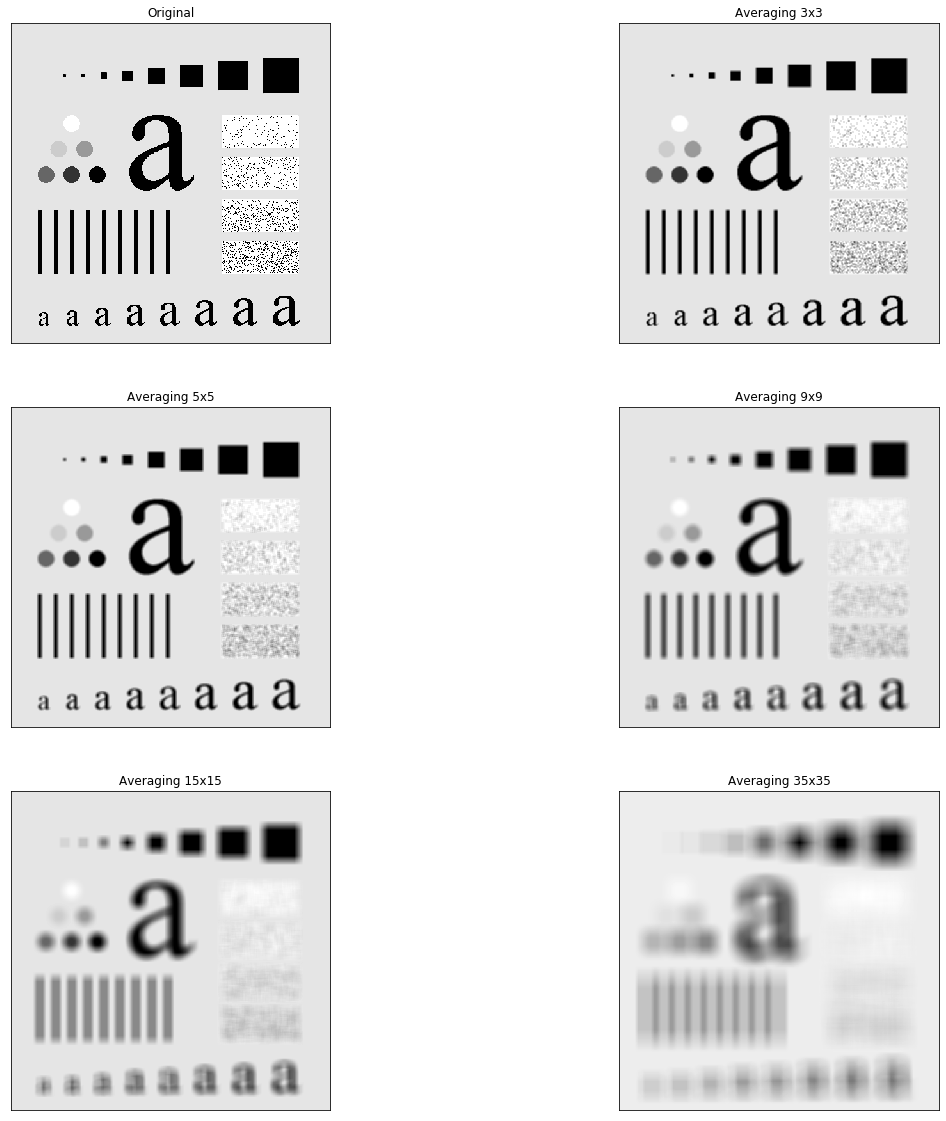

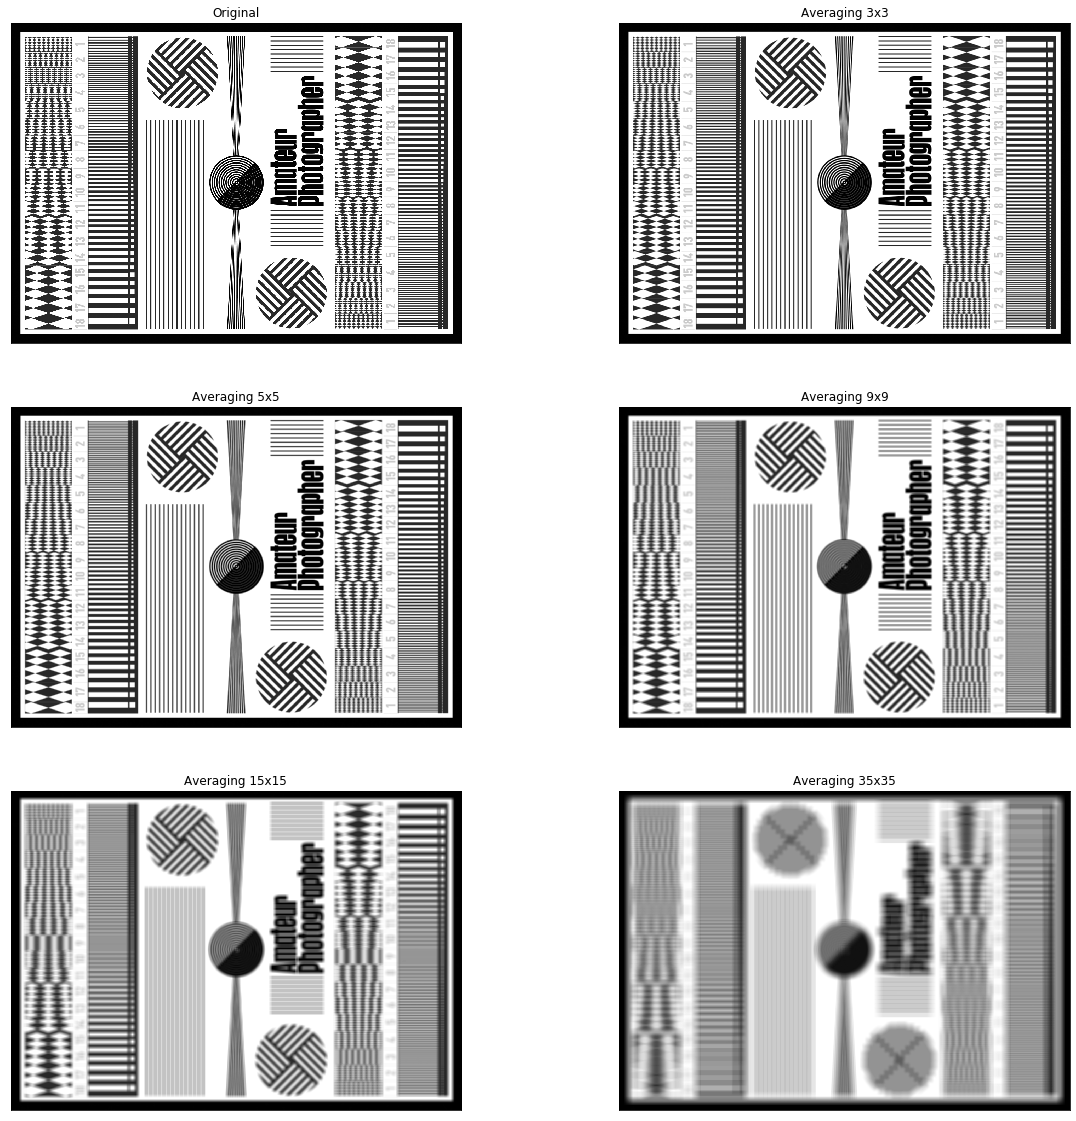

In [0]:
plt.figure(figsize=(20,20))
plt.subplot(321),plt.imshow(img_ref, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(dst_ref3, cmap='gray'),plt.title('Averaging 3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(323),plt.imshow(dst_ref5, cmap='gray'),plt.title('Averaging 5x5')
plt.xticks([]), plt.yticks([])
plt.subplot(324),plt.imshow(dst_ref9, cmap='gray'),plt.title('Averaging 9x9')
plt.xticks([]), plt.yticks([])
plt.subplot(325),plt.imshow(dst_ref15, cmap='gray'),plt.title('Averaging 15x15')
plt.xticks([]), plt.yticks([])
plt.subplot(326),plt.imshow(dst_ref35, cmap='gray'),plt.title('Averaging 35x35')
plt.xticks([]), plt.yticks([])


plt.figure(figsize=(20,20))
plt.subplot(321),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(dst3, cmap='gray'),plt.title('Averaging 3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(323),plt.imshow(dst5, cmap='gray'),plt.title('Averaging 5x5')
plt.xticks([]), plt.yticks([])
plt.subplot(324),plt.imshow(dst9, cmap='gray'),plt.title('Averaging 9x9')
plt.xticks([]), plt.yticks([])
plt.subplot(325),plt.imshow(dst15, cmap='gray'),plt.title('Averaging 15x15')
plt.xticks([]), plt.yticks([])
plt.subplot(326),plt.imshow(dst35, cmap='gray'),plt.title('Averaging 35x35')
plt.xticks([]), plt.yticks([])
plt.show()

Для усереднення зображення в OpenCV може використовуватися функція **blur**.


### Синтаксис функції
    dst = cv2.blur(src, ksize[, dst[, anchor[, borderType]]])
Параметри:
* **src** - вхідне зображення;<br>
* **ksize** - розмір усереднюючого фільтру.<br>

Дана фукнція використовує аналогічну маску фільтра як і в попередньому прикладі. Відмінність - на вхід функції подається не маска фільтра, а тільки його розмір.

Застосуємо лінійні згладжувальні фільтри різного розміру до вхідного зображення.

In [0]:
blur_ref3 = cv2.blur(img_ref, (3,3))
blur_ref5 = cv2.blur(img_ref, (5,5))
blur_ref9 = cv2.blur(img_ref, (9,9))
blur_ref15 = cv2.blur(img_ref, (15,15))
blur_ref35 = cv2.blur(img_ref, (35,35))

blur3 = cv2.blur(img, (3,3))
blur5 = cv2.blur(img, (5,5))
blur9 = cv2.blur(img, (9,9))
blur15 = cv2.blur(img, (15,15))
blur35 = cv2.blur(img, (35,35))

Відобразимо вхідне зображення та зображення після згладжування усереднюючим фільтром.

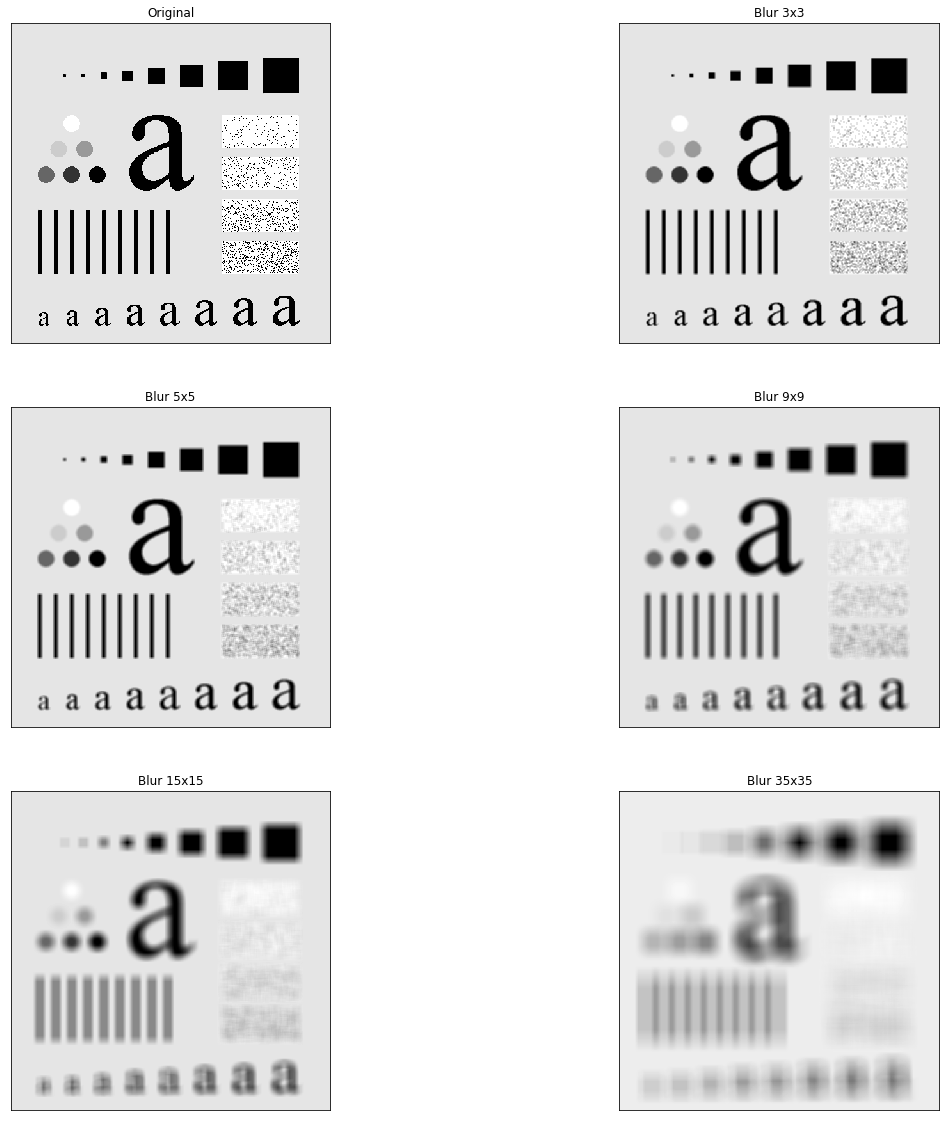

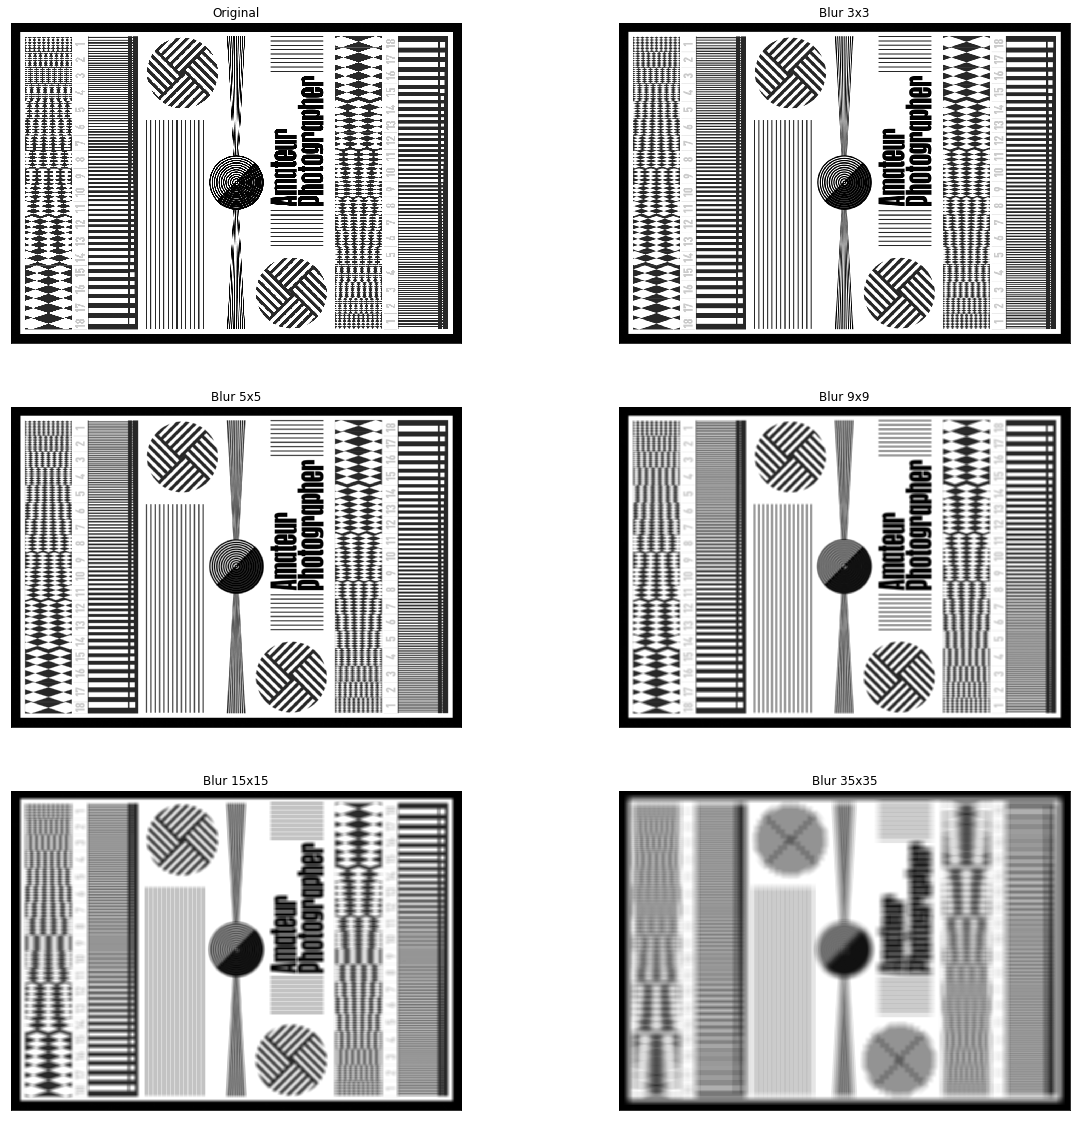

In [0]:
plt.figure(figsize=(20,20))
plt.subplot(321),plt.imshow(img_ref, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(blur_ref3, cmap='gray'),plt.title('Blur 3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(323),plt.imshow(blur_ref5, cmap='gray'),plt.title('Blur 5x5')
plt.xticks([]), plt.yticks([])
plt.subplot(324),plt.imshow(blur_ref9, cmap='gray'),plt.title('Blur 9x9')
plt.xticks([]), plt.yticks([])
plt.subplot(325),plt.imshow(blur_ref15, cmap='gray'),plt.title('Blur 15x15')
plt.xticks([]), plt.yticks([])
plt.subplot(326),plt.imshow(blur_ref35, cmap='gray'),plt.title('Blur 35x35')
plt.xticks([]), plt.yticks([])


plt.figure(figsize=(20,20))
plt.subplot(321),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(blur3, cmap='gray'),plt.title('Blur 3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(323),plt.imshow(blur5, cmap='gray'),plt.title('Blur 5x5')
plt.xticks([]), plt.yticks([])
plt.subplot(324),plt.imshow(blur9, cmap='gray'),plt.title('Blur 9x9')
plt.xticks([]), plt.yticks([])
plt.subplot(325),plt.imshow(blur15, cmap='gray'),plt.title('Blur 15x15')
plt.xticks([]), plt.yticks([])
plt.subplot(326),plt.imshow(blur35, cmap='gray'),plt.title('Blur 35x35')
plt.xticks([]), plt.yticks([])
plt.show()

Також для подавлення шуму та видалення зайвих деталей використовують розмивання Гауса - фільтрація зображення за допомогою функції Гауса:

$$\begin{eqnarray}
G(x,y) = \frac{1}{2\pi\sigma^2}&e^{-\frac{x^2+y^2}{2\sigma^2}}, де
\end{eqnarray}$$

* $ x $ - координата по осі абсцис;
* $ y $ - координата по осі ординат;
* $ \sigma $ - стандартне відхилення розподілу Гауса.




Для фільтрації вхідного зображення за допомогою функції Гауса в OpenCV використовується функція **GaussianBlur**.

### Синтаксис функції
    dst = cv2.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]])
Параметри:
* **src** - вхідне зображення;<br>
* **ksize** - розмір усереднюючого фільтру;<br>
* **sigmaX** - стандартне відхилення в напрямку осі абсцис;<br>
* **sigmaY** - розмір усереднюючого в напрямку осі ординат (якщо задається **sigmaY**=0, то автоматично встановлюється **sigmaY**=**sigmaX**).<br>

Застосуємо розмивання Гауса до вхідного зображення з фільтрами розмірами - 3x3, 5x5, 9x9, 15x15, 35x35 та нульовим стандартним відхиленням у напрямку осі абсцис та ординат.

In [0]:
gblur_ref3 = cv2.GaussianBlur(img_ref,(3,3),0)
gblur_ref5 = cv2.GaussianBlur(img_ref,(5,5),0)
gblur_ref9 = cv2.GaussianBlur(img_ref,(9,9),0)
gblur_ref15 = cv2.GaussianBlur(img_ref,(15,15),0)
gblur_ref35 = cv2.GaussianBlur(img_ref,(35,35),0)

gblur3 = cv2.GaussianBlur(img,(3,3),0)
gblur5 = cv2.GaussianBlur(img,(5,5),0)
gblur9 = cv2.GaussianBlur(img,(9,9),0)
gblur15 = cv2.GaussianBlur(img,(15,15),0)
gblur35 = cv2.GaussianBlur(img,(35,35),0)

Відобразимо вхідне зображення та зображення після розмивання Гауса.

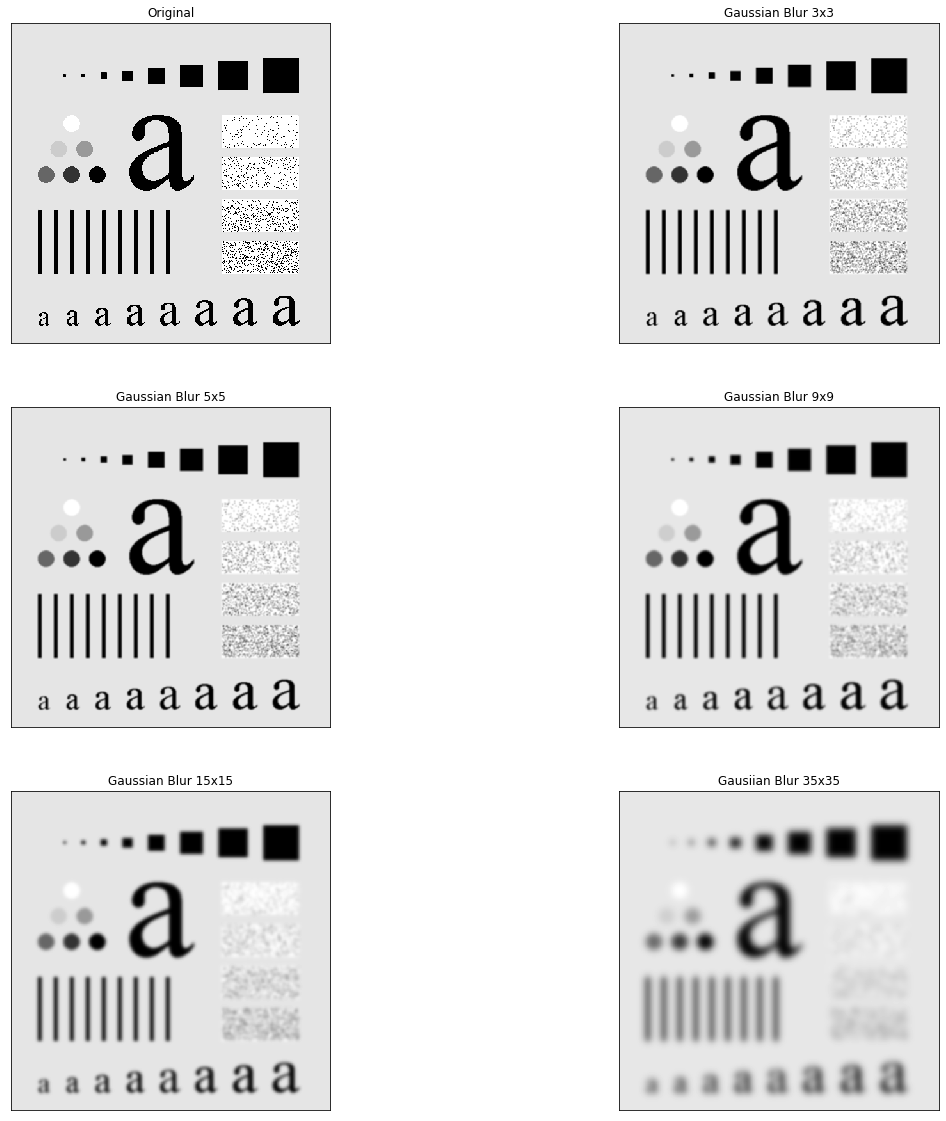

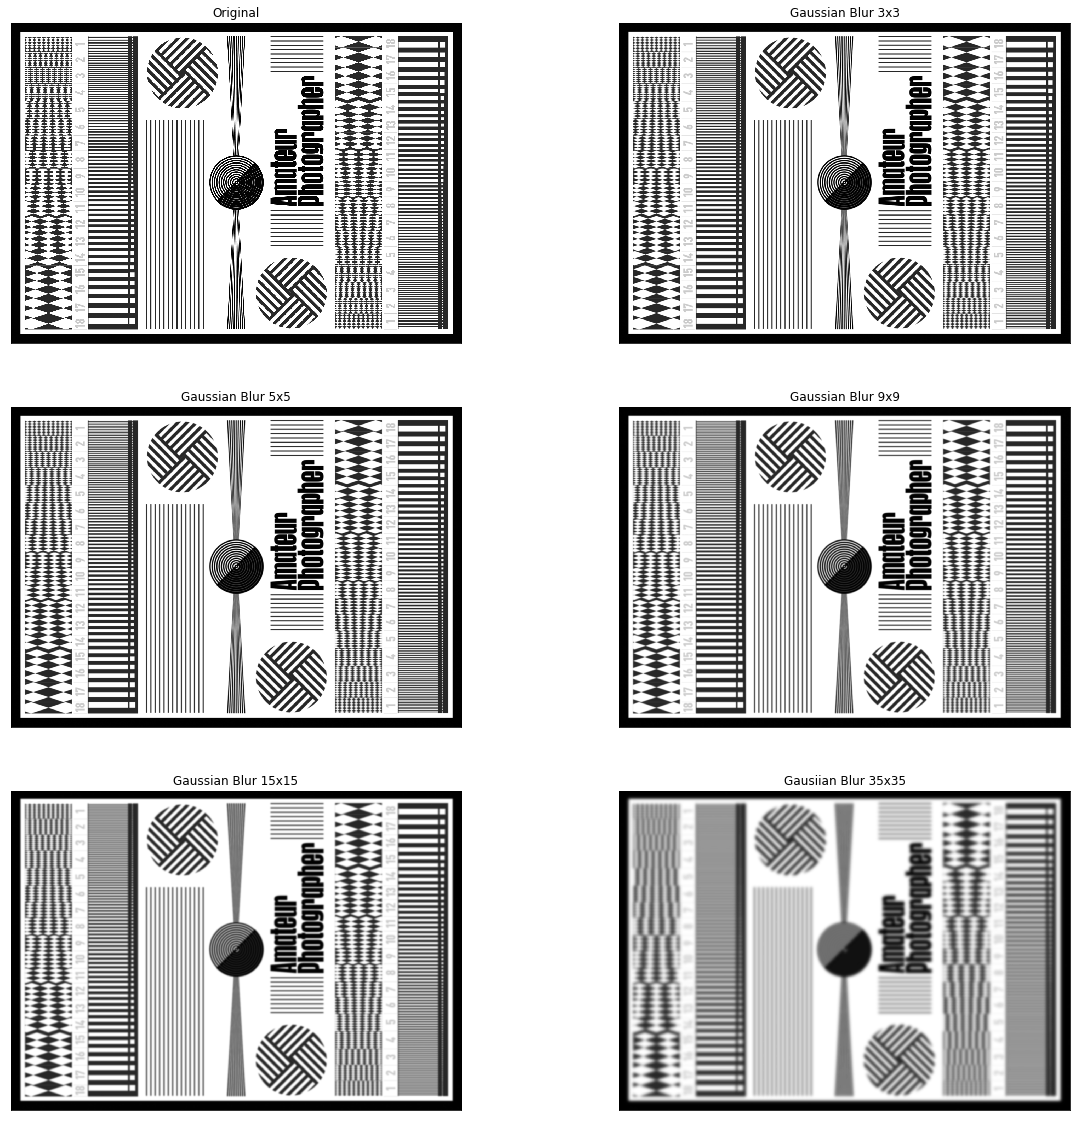

In [0]:
plt.figure(figsize=(20,20))
plt.subplot(321),plt.imshow(img_ref, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(gblur_ref3, cmap='gray'),plt.title('Gaussian Blur 3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(323),plt.imshow(gblur_ref5, cmap='gray'),plt.title('Gaussian Blur 5x5')
plt.xticks([]), plt.yticks([])
plt.subplot(324),plt.imshow(gblur_ref9, cmap='gray'),plt.title('Gaussian Blur 9x9')
plt.xticks([]), plt.yticks([])
plt.subplot(325),plt.imshow(gblur_ref15, cmap='gray'),plt.title('Gaussian Blur 15x15')
plt.xticks([]), plt.yticks([])
plt.subplot(326),plt.imshow(gblur_ref35, cmap='gray'),plt.title('Gausiian Blur 35x35')
plt.xticks([]), plt.yticks([])

plt.figure(figsize=(20,20))
plt.subplot(321),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(gblur3, cmap='gray'),plt.title('Gaussian Blur 3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(323),plt.imshow(gblur5, cmap='gray'),plt.title('Gaussian Blur 5x5')
plt.xticks([]), plt.yticks([])
plt.subplot(324),plt.imshow(gblur9, cmap='gray'),plt.title('Gaussian Blur 9x9')
plt.xticks([]), plt.yticks([])
plt.subplot(325),plt.imshow(gblur15, cmap='gray'),plt.title('Gaussian Blur 15x15')
plt.xticks([]), plt.yticks([])
plt.subplot(326),plt.imshow(gblur35, cmap='gray'),plt.title('Gausiian Blur 35x35')
plt.xticks([]), plt.yticks([])
plt.show()

## Нелінійна фільтрація

Нелінійна фільтрація - фільтрація зображення при якій виконуються нелінійні операції над пікселями в межах маски фільтру. Прикладами нелінійних операцій є визначення максимального, мінімального або медіанного значення інтенсивносіт пікселя в межах маски фільтру. Фільтрація полягає у заміні початкового значення інтенсивності пікселя в середині маски на значення отримане в результаті упорядкування значень інтенсивності пікселів в межах маски фільтру.


Для фільтрації зображення за допомогою нелінійної операції (визначення медіанного значення) в OpenCV використовується функція **medianBlur**.

### Синтаксис функції
    dst = cv2.medianBlur(src, ksize[, dst])
Параметри:
* **src** - вхідне зображення 1-, 3-, 4- колірними каналами, фільтр застосовується окремо для кожного каналу;<br>
* **ksize** - розмір медіанного фільтру (тільки непарне число).<br>


Зчитаємо та завантажимо вхідне чорно-біле зображення.

In [0]:
img_ref = cv2.imread('./Fig0335a.tiff', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('./J13Wn.jpg', cv2.IMREAD_GRAYSCALE)

Застосуємо одночасно лінійний згладжувальний фільтр та медіанний фільтр однакових розмірів (3х3) до вхідного зображення для усунення імпульсного шуму (salt and pepper).

In [0]:
blur_ref3 = cv2.blur(img_ref, (3,3))
median_ref3 = cv2.medianBlur(img_ref, 3)

blur3 = cv2.blur(img, (3,3))
median3 = cv2.medianBlur(img, 3)

Відобразимо вхідне зображення та результуючі зображення після фільтрації.

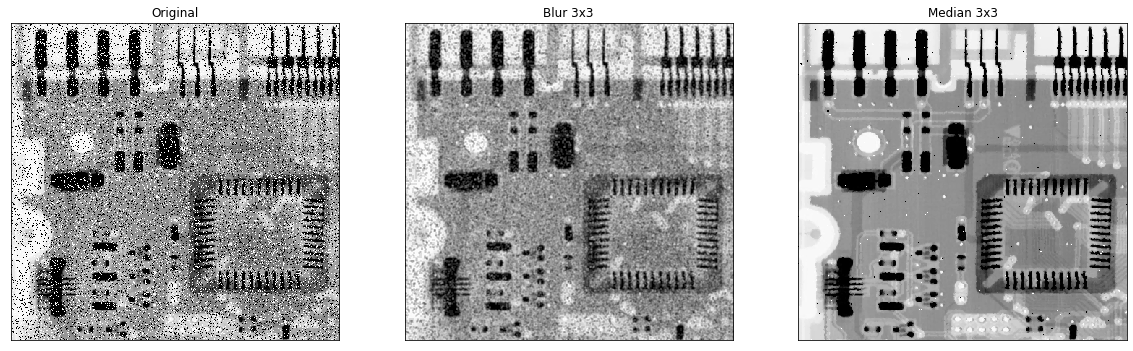

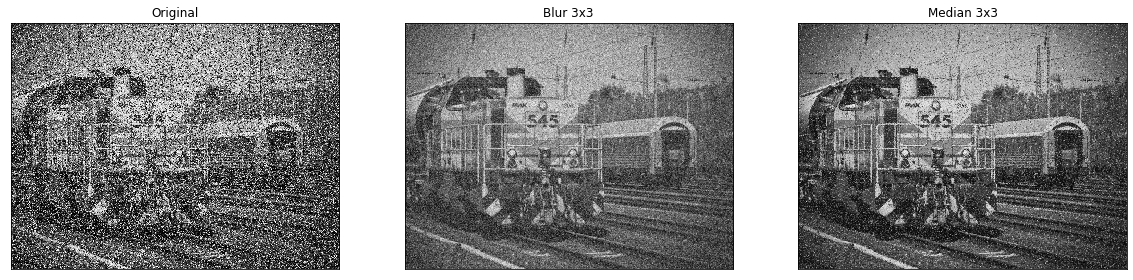

In [0]:
plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(img_ref, cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(blur_ref3, cmap='gray'), plt.title('Blur 3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(median_ref3, cmap='gray'), plt.title('Median 3x3')
plt.xticks([]), plt.yticks([])

plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(blur3, cmap='gray'), plt.title('Blur 3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(median3, cmap='gray'), plt.title('Median 3x3')
plt.xticks([]), plt.yticks([])
plt.show()

## Фільтри підвищення різкості

Зчитаємо та завантажимо вхідне чорно-біле зображення.

In [0]:
img_ref = cv2.imread("./Fig0338a.tif", cv2.IMREAD_GRAYSCALE)
img = cv2.imread("./DSC100279394.jpg", cv2.IMREAD_GRAYSCALE)

### Підвищення різкості за допомогю других похідних
Створимо фільтр для реалізації рівняння двумірного лапласіана

In [0]:
kernel_sharpening = np.array([[0,-1,0], 
                              [-1, 5,-1],
                              [0,-1,0]])

kernel_sharpening_diag = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])

Застосуємо фільтр для вхідного зображення для підвищення його різкості.

In [0]:
sharpened_ref = cv2.filter2D(img_ref, -1, kernel_sharpening)
sharpened_diag__ref = cv2.filter2D(img_ref, -1, kernel_sharpening_diag)

sharpened = cv2.filter2D(img, -1, kernel_sharpening)
sharpened_diag = cv2.filter2D(img, -1, kernel_sharpening_diag)

Відобразимо вхідне зображення та результуюче зображення після підвищення різкості за допомого заданого фільтра.

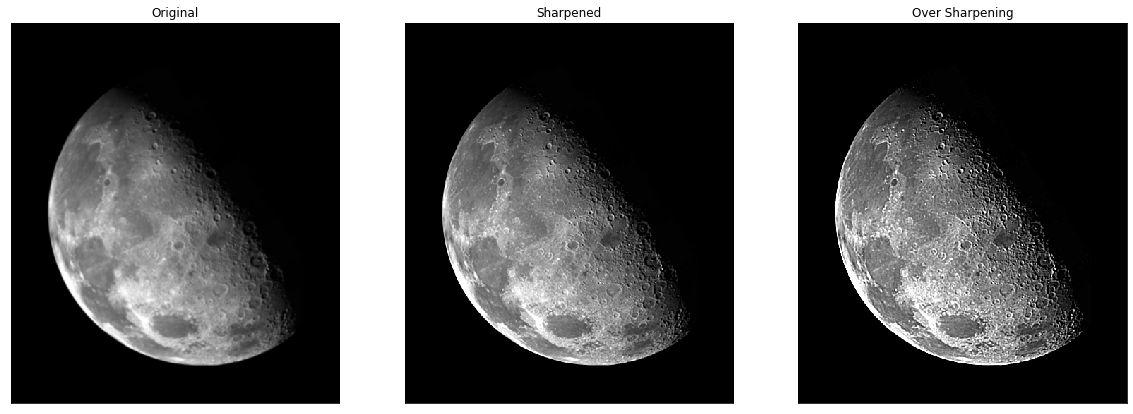

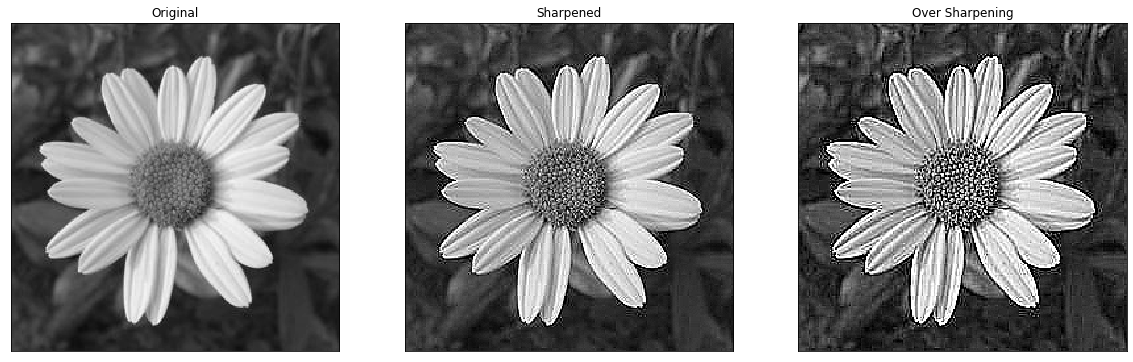

In [0]:
plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(img_ref, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(sharpened_ref, cmap='gray'),plt.title('Sharpened')
plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(sharpened_diag__ref, cmap='gray'),plt.title('Over Sharpening')
plt.xticks([]), plt.yticks([])


plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(sharpened, cmap='gray'),plt.title('Sharpened')
plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(sharpened_diag, cmap='gray'),plt.title('Over Sharpening')
plt.xticks([]), plt.yticks([])
plt.show()

### Підвищення різкості за допомогою нерізкого маскування

Зчитаємо та завантажимо вхідне чорно-біле зображення.

In [0]:
img = cv2.imread('./Fig0340a.tif', cv2.IMREAD_GRAYSCALE)

За домогою розмивання Гауса створимо нерізке зображення.

In [0]:
blur = cv2.GaussianBlur(img, (5, 5), 3)

Визначимо нерізку маску віднявши нерізке зображення від вхідного зображення.

In [0]:
mask = img.astype(np.int16) - blur.astype(np.int16)

Створимо вихідне зображення додаванням нерізкої маски до вхідного зображення.

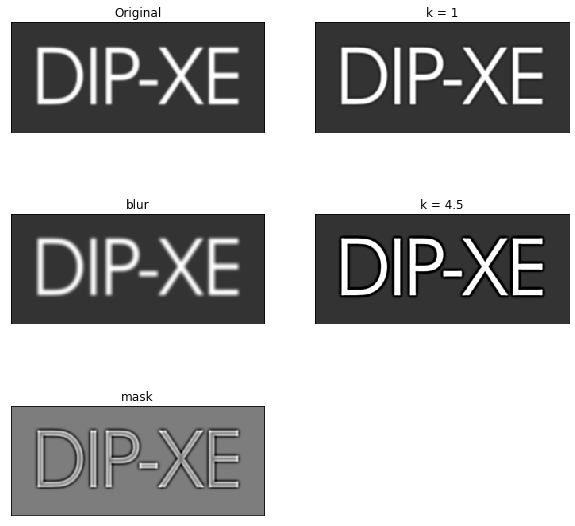

In [0]:
k = 1
dst1 = img.astype(np.int16) + k * mask

k = 4.5
dst45 = img.astype(np.int16) + k * mask

plt.figure(figsize=(10, 10))
plt.subplot(321),plt.imshow(img, cmap='gray', vmin = 0, vmax = 255),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(323),plt.imshow(blur, cmap='gray', vmin = 0, vmax = 255),plt.title('blur')
plt.xticks([]), plt.yticks([])
plt.subplot(325),plt.imshow(mask, cmap='gray'),plt.title('mask')
plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(dst1, cmap='gray', vmin = 0, vmax = 255),plt.title('k = 1')
plt.xticks([]), plt.yticks([])
plt.subplot(324),plt.imshow(dst45, cmap='gray', vmin = 0, vmax = 255),plt.title('k = 4.5')
plt.xticks([]), plt.yticks([])
plt.show()

# Завдання
## 1. Порівняти гістограми двох зображень після просторової фільтрації.
<table><tr>
<td> <img src="https://github.com/mosolab/DIP/blob/Images/assignments/Lab3_half100.png?raw=1" height="200" width="200"> </td>
<td> <img src="https://github.com/mosolab/DIP/blob/Images/assignments/Lab3_chess100.png?raw=1" height="200" width="200"> </td>
</tr></table>

1.1. Відкрити та завантажити наступні два зображення:
    * assignments/Lab3_half100.png
    * assignments/Lab3_chess100.png

In [0]:
img_half = cv2.imread('./Lab3_half100.png', cv2.IMREAD_GRAYSCALE)
img_chess = cv2.imread('./Lab3_chess100.png', cv2.IMREAD_GRAYSCALE)

1.2.Визначити гістограму для кожного зображення:

In [0]:
#img_half
hist_half = cv2.calcHist([img_half], [0], None, [256], [0, 256])
#img_chess
hist_chess = cv2.calcHist([img_chess], [0], None, [256], [0, 256])

1.3.Відобразити завантаженні зображення та відповідно визначені гістограми зображень за допомогою функції **plt.subplot**:

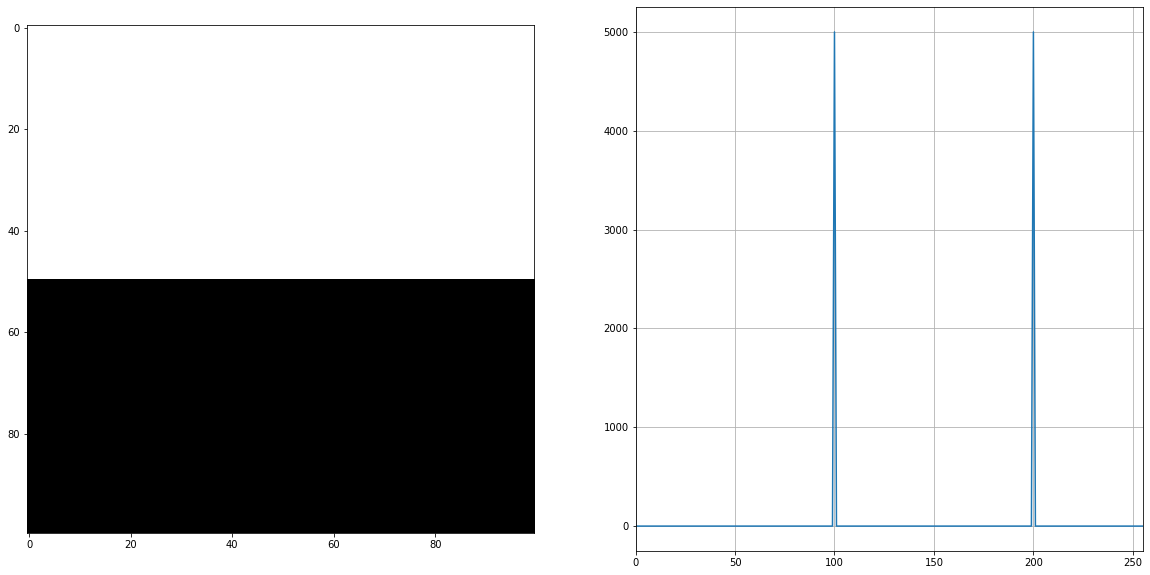

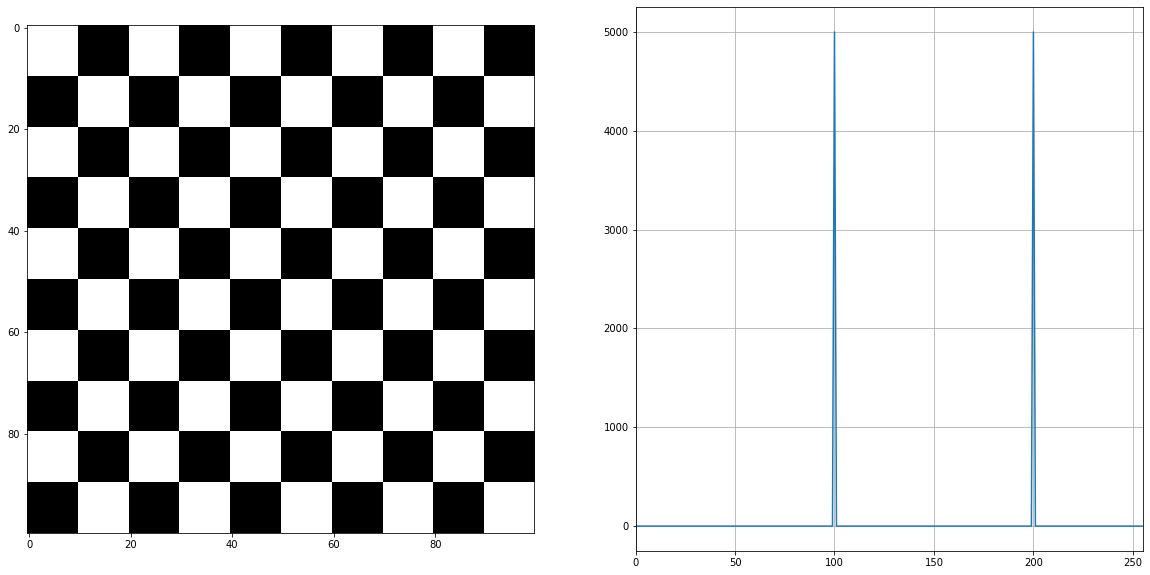

In [0]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img_half, cmap = 'gray');
plt.subplot(122)
plt.plot(hist_half); plt.xlim([0, 255]); plt.grid(); plt.show();

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img_chess, cmap = 'gray');
plt.subplot(122)
plt.plot(hist_chess); plt.xlim([0, 255]); plt.grid(); plt.show();

plt.show();

1.4 Виконати просторову фільтрацію зображень використовуючи згладжувальний фільтра або розмивання Гауса з  розмірами - 3x3, 5x5, 9x9, 15x15.

In [0]:
half_blur3 = cv2.cv2.blur(img_half, (3,3))
half_blur5 = cv2.cv2.blur(img_half, (5,5))
half_blur9 = cv2.cv2.blur(img_half, (9,9))
half_blur15 = cv2.cv2.blur(img_half, (15,15))

chess_blur3 = cv2.blur(img_chess, (3,3))
chess_blur5 = cv2.blur(img_chess, (5,5))
chess_blur9 = cv2.blur(img_chess, (9,9))
chess_blur15 = cv2.blur(img_chess, (15,15))

1.5 Визначити гістограми для всіх отриманих зображень.

In [0]:
half_blur3_hist = cv2.calcHist([half_blur3], [0], None, [256], [0, 256])
half_blur5_hist = cv2.calcHist([half_blur5], [0], None, [256], [0, 256])
half_blur9_hist = cv2.calcHist([half_blur9], [0], None, [256], [0, 256])
half_blur15_hist = cv2.calcHist([half_blur15], [0], None, [256], [0, 256])

chess_blur3_hist = cv2.calcHist([chess_blur3], [0], None, [256], [0, 256])
chess_blur5_hist = cv2.calcHist([chess_blur5], [0], None, [256], [0, 256])
chess_blur9_hist = cv2.calcHist([chess_blur9], [0], None, [256], [0, 256])
chess_blur15_hist = cv2.calcHist([chess_blur15], [0], None, [256], [0, 256])

1.6.Відобразити отримані після фільтрації зображення та відповідно визначені гістограми за допомогою функції plt.subplot:

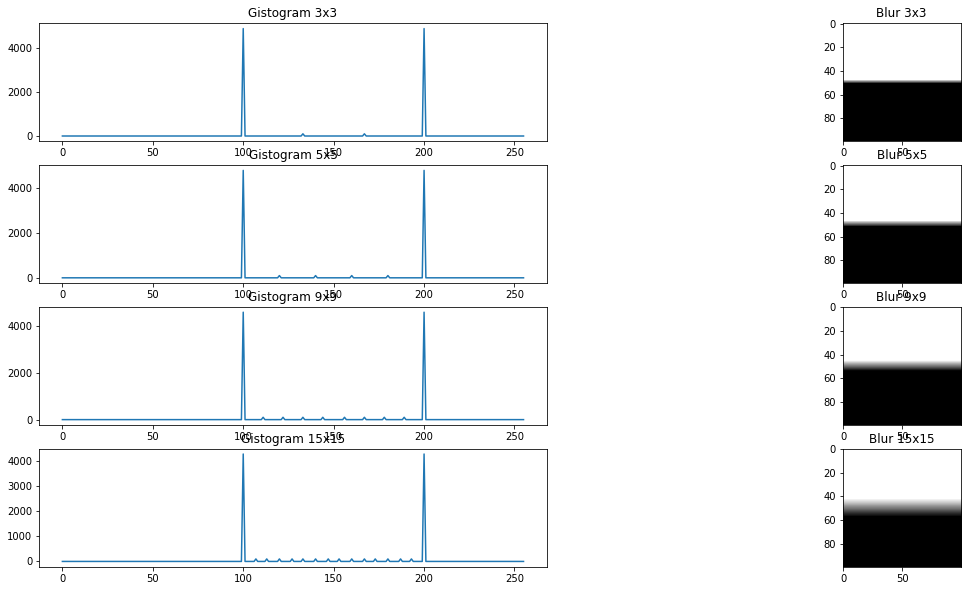

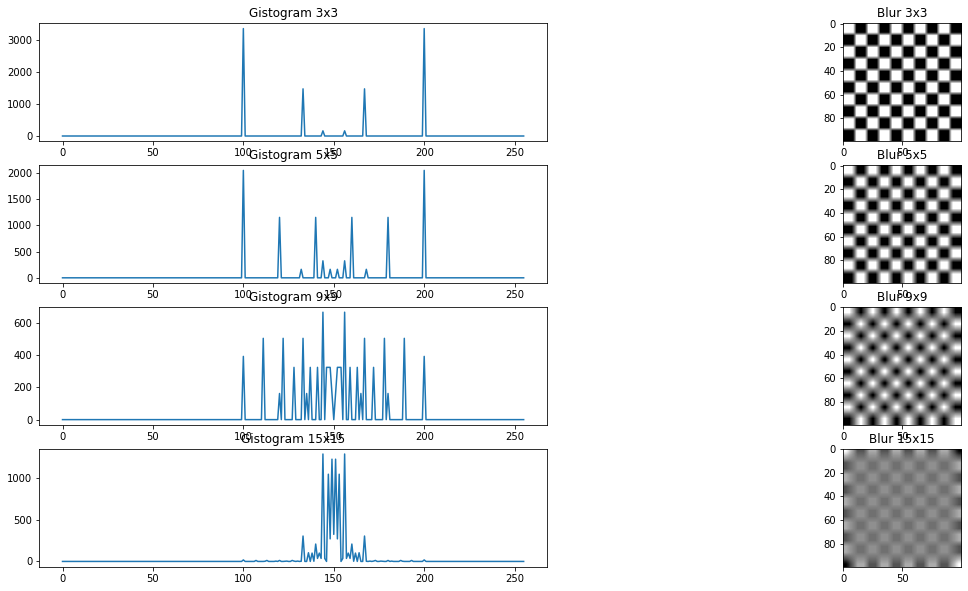

In [0]:
plt.figure(figsize=(20,10))
plt.subplot(4,2,1)
plt.plot(half_blur3_hist), plt.title('Gistogram 3x3');
plt.subplot(4,2,2),plt.imshow(half_blur3, cmap='gray'),plt.title('Blur 3x3')
plt.subplot(4,2,3)
plt.plot(half_blur5_hist), plt.title('Gistogram 5x5');
plt.subplot(4,2,4),plt.imshow(half_blur5, cmap='gray'),plt.title('Blur 5x5')
plt.subplot(4,2,5)
plt.plot(half_blur9_hist), plt.title('Gistogram 9x9');
plt.subplot(4,2,6),plt.imshow(half_blur9, cmap='gray'),plt.title('Blur 9x9')
plt.subplot(4,2,7)
plt.plot(half_blur15_hist), plt.title('Gistogram 15x15');
plt.subplot(4,2,8),plt.imshow(half_blur15, cmap='gray'),plt.title('Blur 15x15')

plt.figure(figsize=(20,10))
plt.subplot(4,2,1)
plt.plot(chess_blur3_hist), plt.title('Gistogram 3x3');
plt.subplot(4,2,2),plt.imshow(chess_blur3, cmap='gray'),plt.title('Blur 3x3')
plt.subplot(4,2,3)
plt.plot(chess_blur5_hist), plt.title('Gistogram 5x5');
plt.subplot(4,2,4),plt.imshow(chess_blur5, cmap='gray'),plt.title('Blur 5x5')
plt.subplot(4,2,5)
plt.plot(chess_blur9_hist), plt.title('Gistogram 9x9');
plt.subplot(4,2,6),plt.imshow(chess_blur9, cmap='gray'),plt.title('Blur 9x9')
plt.subplot(4,2,7)
plt.plot(chess_blur15_hist), plt.title('Gistogram 15x15');
plt.subplot(4,2,8),plt.imshow(chess_blur15, cmap='gray'),plt.title('Blur 15x15')

plt.show();